In [1]:
import numpy as np

## 연습문제 3.2

#### (a)

In [123]:
U, X = np.linalg.qr(np.random.rand(80,80))
V, X = np.linalg.qr(np.random.rand(80,80))

S = np.matrix(np.eye(80))
for i in range(0,80):
    S[i,i] = 2**(-(i+1))
    
A = np.dot(np.dot(U,S), V)

In [124]:
def clgs(A):
    m, n = np.shape(A)[0], np.shape(A)[1]
    V = A.copy()
    Q = np.matrix(np.eye(m,n))
    R = np.matrix(np.zeros((n,n)))
    for j in range(0,n):
        for i in range(0,j-1):
            R[i,j] = np.dot(Q[:,i].transpose(), A[:,j])
            V[:,j] = V[:,j] - (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j]
    
    return Q,R

In [125]:
def grams(A):
    m, n = np.shape(A)[0], np.shape(A)[1]
    Q = A.copy()
    R = np.matrix(np.zeros((n,n)))
    for i in range(0,n-1):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i] / R[i,i]
        R[i,i+1:n] = np.dot(Q[:,i].transpose(), Q[:,i+1:n])
        Q[:,i+1:n] = Q[:,i+1:n] - np.dot(Q[:,i], np.matrix(R[i,i+1:n]))
    R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
    Q[:,n-1]=Q[:,n-1]/R[n-1,n-1]
    
    return Q, R

In [126]:
Qc, Rc = clgs(A)
Qm, Rm = grams(A)

In [127]:
import matplotlib.pyplot as plt

In [128]:
x=list()
y=list()
x2= list()
y2= list()

for j in range(0,80):
    x.append(Rc[j,j])
    y.append(j+1)
    
    x2.append(Rm[j,j])
    y2.append(j+1)

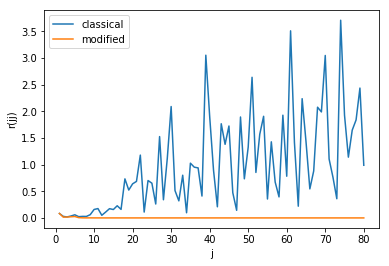

In [129]:
plt.plot(y,x)
plt.plot(y2,x2)
plt.xlabel('j')
plt.ylabel('r(jj)')
plt.legend(['classical', 'modified'])
plt.show()

- 위 그래프를 통해 modified gram-schmidt가 더 안정적임을 알 수 있다

#### (b)

In [130]:
def qrhouse(A):
    m, n = np.shape(A)[0], np.shape(A)[1]
    R = A.copy()
    V = np.matrix(np.zeros((m,n)))
    for k in range(0, min(m-1,n)):
        x = R[k:m,k]
        v = x + int(np.sign(x[0]))*np.linalg.norm(x)*np.matrix(np.eye(len(x),1))
        V[k:m,k] = np.matrix(v)
        R[k:m,k:n] = R[k:m,k:n]- np.dot(2*v, np.dot(v.transpose(),R[k:m,k:n])) / np.dot(v.transpose(),v)
        
    R = np.triu(R[0:n,0:n])
    
    def formQ(V):
        m, n = np.shape(V)[0], np.shape(V)[1]
        Q = np.matrix(np.eye(m))
        for j in range(min(m-1,n)-1,-1,-1):
            v = V[:,j]
            Q = Q - np.dot(2*v, np.dot(v.transpose(),Q)) / np.dot(v.transpose(),v)
        
        return Q
    Q = formQ(V
             )
    return Q, R

In [131]:
U, X = np.linalg.qr(np.random.rand(80,80))
V, X = np.linalg.qr(np.random.rand(80,80))

S = np.matrix(np.eye(80))
for i in range(0,80):
    S[i,i] = 2**(-(i+1))
    
A = np.dot(np.dot(U,S), V)

In [132]:
Q,R = qrhouse(A)

In [133]:
Q

matrix([[-0.189694  ,  0.04923078, -0.11530613, ..., -0.08516735,
          0.08934024,  0.1473828 ],
        [-0.28771054, -0.07410057, -0.10054246, ..., -0.05431428,
          0.0283093 ,  0.08489185],
        [ 0.05235034,  0.16694462, -0.12783571, ...,  0.08219922,
         -0.13746565, -0.0246259 ],
        ...,
        [ 0.07972931,  0.14490915,  0.09814582, ..., -0.00130725,
         -0.07251585, -0.08643571],
        [-0.01321822,  0.07018145,  0.15870489, ..., -0.10940902,
          0.07292112,  0.09519552],
        [-0.05124691,  0.08351781,  0.19236119, ...,  0.09762513,
         -0.00273743, -0.04631485]])

In [136]:
R

array([[-5.16981077e-02,  1.05006174e-02,  2.90949295e-02, ...,
         2.22512129e-02,  4.85941202e-02, -4.76642975e-02],
       [ 0.00000000e+00, -6.45781337e-02, -8.77523963e-02, ...,
         5.64491777e-03, -9.55308143e-02,  1.00985240e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.79195432e-02, ...,
        -3.59984039e-03, -8.64898140e-04,  1.36610812e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.12955527e-18,  2.32699535e-18, -1.54545286e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.52047511e-18,  6.47062697e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.76396359e-19]])

In [138]:
A = np.matrix(([0.70000, 0.70711],[0.70001,0.70711]))

In [141]:
Qm, Rm = grams(A)
Q, R = qrhouse(A)

In [143]:
print(np.linalg.norm(np.dot(Q.transpose(), Q)-np.matrix(np.eye(2))))

3.451616545114987e-16


In [144]:
print(np.linalg.norm(np.dot(Qm.transpose(), Qm)-np.matrix(np.eye(2))))

3.254726094493924e-11


- 위 결과를 통해 하우스홀더 QR분해가 수정 그람-슈미츠 QR 분해보다 numerically stable함을 알 수 있다.

## 연습문제 3.3

In [593]:
def givens_matrix(A,i,j):
    m, n = np.shape(A)[0], np.shape(A)[1]
    G = np.matrix(np.eye(n))
    
    r = np.sqrt(A[i,j]**2 + A[j,j]**2)
    cos_theta = A[i,i] / r
    sin_theta = -(A[i,j] / r)
     
    G[i,i] = cos_theta
    G[j,j] = cos_theta
    G[j,i] = +sin_theta
    G[i,j] = -sin_theta
    
    return G

In [594]:
def qrgivens(A):
    m, n = np.shape(A)[0], np.shape(A)[1]
    Q = np.matrix(np.eye(n))
    R = A.copy()
    for i in range(0,n):
        for j in range(m-1,i,-1):
            G = givens_matrix(A,j,i)
            print(j,i)
            print(G)
            R = np.dot(G,R)
            Q = np.dot(G,Q)
            print(R)
            
    return Q, R

In [595]:
A = np.matrix(([3.0, 2.0, 1.0],[4.0,7.0,2.0],[3.0,5.0,6.0]))

In [596]:
A

matrix([[3., 2., 1.],
        [4., 7., 2.],
        [3., 5., 6.]])

In [597]:
Q,R = qrgivens(A)

2 0
[[ 1.41421356  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          1.41421356]]
[[ 2.12132034 -0.70710678 -2.82842712]
 [ 4.          7.          2.        ]
 [ 6.36396103  8.48528137  9.19238816]]
1 0
[[ 1.4 -0.8  0. ]
 [ 0.8  1.4  0. ]
 [ 0.   0.   1. ]]
[[-0.23015152 -6.58994949 -5.55979797]
 [ 7.29705627  9.23431458  0.5372583 ]
 [ 6.36396103  8.48528137  9.19238816]]
2 1
[[ 1.          0.          0.        ]
 [ 0.          0.69748583 -0.58123819]
 [ 0.          0.58123819  0.69748583]]
[[-0.23015152 -6.58994949 -5.55979797]
 [ 1.39061616  1.50883397 -4.96823703]
 [ 8.68010047 11.28569987  6.72383555]]


In [598]:
Q

matrix([[ 1.97989899, -0.8       , -0.98994949],
        [ 0.37811767,  0.97648017, -1.21655251],
        [ 1.15079291,  0.81373347,  0.65759595]])

In [599]:
R

matrix([[-0.23015152, -6.58994949, -5.55979797],
        [ 1.39061616,  1.50883397, -4.96823703],
        [ 8.68010047, 11.28569987,  6.72383555]])

## 연습문제 4.3